In [1]:
# os, to see if a file exists
import os
# tabular data manipulation
import numpy as np
import pandas as pd
# data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# train test split
from sklearn.model_selection import train_test_split

Function for acquiring dataset

In [2]:
def acquire_student_grades():
    if os.path.exists('student_grades.csv'):
        return pd.read_csv('student_grades.csv')
    else:
        print('Good luck next time')
        return None
os.path.exists('student_grades.csv')

True

In [3]:
df = acquire_student_grades()

Shape, Info, Describe

In [4]:
df.shape

(104, 5)

In [5]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,103.000000,104.000000,103.000000,104.000000
mean,52.500000,78.398058,77.307692,84.242718,81.692308
std,30.166206,14.339948,10.295703,8.709321,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


Meaningful Takeaways:

    - student_id, potentially arbitrary
    - exam 1 and 3 are floats, while exam 2 is an integer
    - final grade is also an integer
    - three exam grades
    - 104 entries, except e.1 and e.3 are missing 1 row each

In [7]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


Investigations:

    - e.1 or e.3 -> floats
    - If current floats are all .0 -> integer
    - Where are the missing values?

What do we want to know about the data?

What do we want to predict?

    - Estimate failure -> Final Grade = Target

Planning and problem statement:

    - Can we predict the final grade of a given student will be based on previous exam scores?

Drop student id column, no additional value.

In [8]:
df = df.drop(columns='student_id')

Bump up the index by 1 for every instance, if desired

    - df.index = [i + 1 for i in df.index.to_list()]

In [9]:
df.index = [i + 1 for i in df.index.to_list()]

In [10]:
df.head()

,exam1,exam2,exam3,final_grade
1,100.0,90,95.0,96
2,98.0,93,96.0,95
3,85.0,83,87.0,87
4,83.0,80,86.0,85
5,93.0,90,96.0,97


Tackle missing/null

In [11]:
df.isna().sum()

exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

Boolean Mask

In [12]:
df['exam3'].isna().value_counts()

False    103
True       1
Name: exam3, dtype: int64

In [13]:
df['exam1'].isna().value_counts()

False    103
True       1
Name: exam1, dtype: int64

Shows the values werent in the same row

In [14]:
df.dropna().shape

(102, 4)

In [15]:
df = df.dropna()

In [16]:
df.shape

(102, 4)

Float vs. Integer
    
    - does e.1 and e.3 need to be in float?
    

    - Can compare a float value to an int value and assess the truth value upon retention

In [17]:
# Strat 1
(df['exam1'].astype(int) == df['exam1']).value_counts()

True    102
Name: exam1, dtype: int64

In [18]:
# Strat 2 - String always ends in 0
df['exam1'].astype(str).str.endswith('0').value_counts()

True    102
Name: exam1, dtype: int64

In [19]:
df['exam3'].astype(str).str.endswith('0').value_counts()

True    102
Name: exam3, dtype: int64

Conclude that everything can be cast as an integer. No additional value for float.

In [20]:
df['exam1'].astype(int)
df['exam3'].astype(int)

1      95
2      96
3      87
4      86
5      96
       ..
100    78
101    79
102    70
103    75
104    78
Name: exam3, Length: 102, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exam1        102 non-null    float64
 1   exam2        102 non-null    int64  
 2   exam3        102 non-null    float64
 3   final_grade  102 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.0 KB


In [22]:
def clean_student_grades(df):
    '''
    takes in a single pandas dataframe with the expected formatting observed in student_grades
    It will remove the student id column
    It will remove any records containing null values
    and it will cast any floats into integers
    
    argument: df, a pandas DataFrame
    return: df, a pandas Dataframe (cleaned)
    '''
    
    # drop the student id column
    df = df.drop(columns='student_id')
    
    # drop the missing/null
    df = df.dropna()
    
    # cast the two series with floats into ints
    df = df.astype(int)
    return df

In [23]:
def split_my_students(df):
    '''
    Arguments: df, a single pandas dataframe
    Returns: train, validate, test - Three Pandas DataFrames
    '''
    
    train_val, test = train_test_split(df, 
                                       random_state=1423,
                                       train_size=0.7) # no stratify needed
    
    train, validate = train_test_split(train_val, 
                                       random_state=1423, 
                                       train_size=0.8)
    
    return train, validate, test
    

In [24]:
def wrangle_grades():
    '''
    wrangle goes through process of 
    acquiring students grades,
    clean students grades,
    and split students grades into
    train, validate and test pandas DataFrames
    '''
    return split_my_students(clean_student_grades(acquire_student_grades()))
    

In [25]:
train, validate, test = wrangle_grades()

In [26]:
train.shape, validate.shape, test.shape

((56, 4), (15, 4), (31, 4))

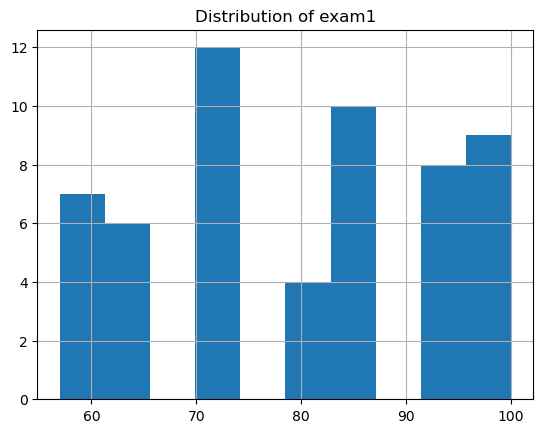

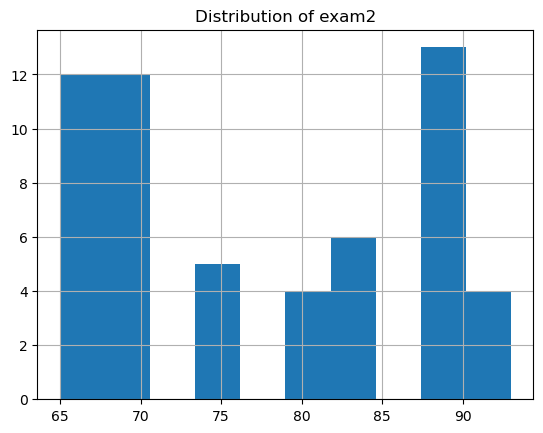

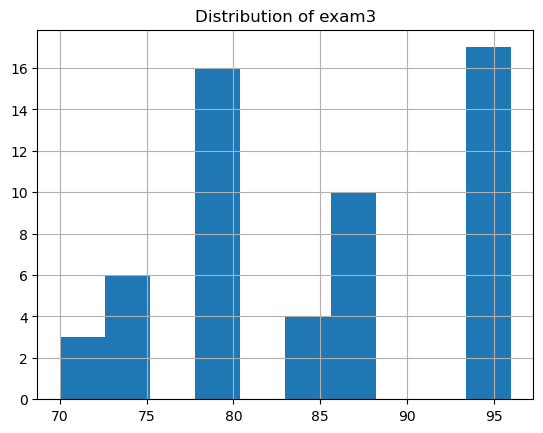

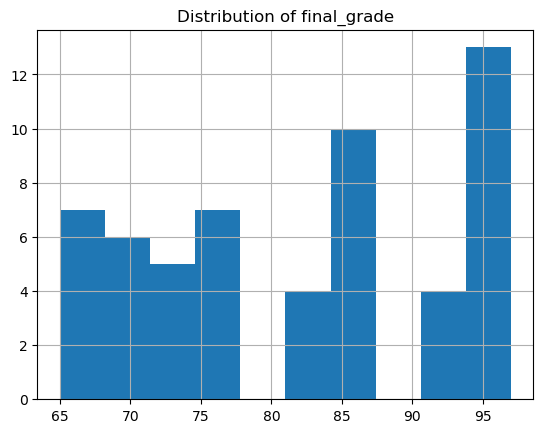

In [27]:
for col in train:
    train[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

Data isnt super normal

    - Is this because the sample size is smaller
    - Is this because there are different types of students
    - If there are different types, how do I know?
    - Will this effect my modeling?

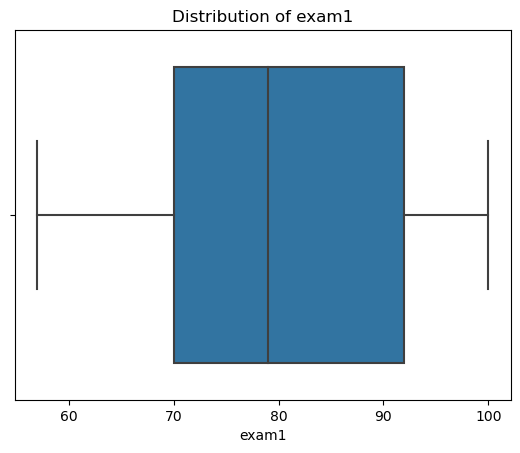

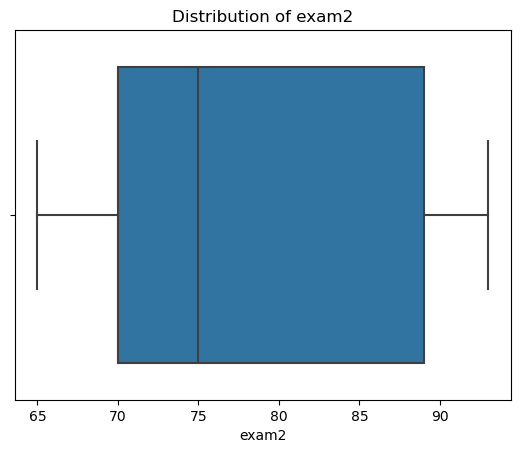

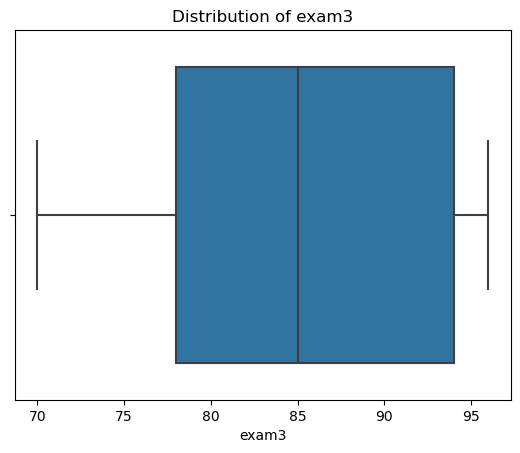

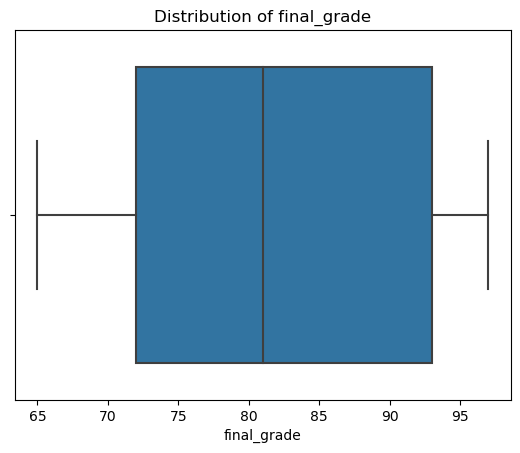

In [28]:
for col in train:
    sns.boxplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()